In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Your code for generating the plot goes here

# Display the plot
plt.show()

# **Importing the Spotify dataset**

In [5]:
df = pd.read_csv(r'D:\Music-Recommender\archive\data.csv')


In [6]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [7]:
df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.143,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5,1
194,0.747,0.6660,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [9]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [10]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [11]:
df['liked'].value_counts()

liked
1    100
0     95
Name: count, dtype: int64

# **Data Preprocessing**

In [12]:
X = df.drop('liked', axis=1)
y = df['liked']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

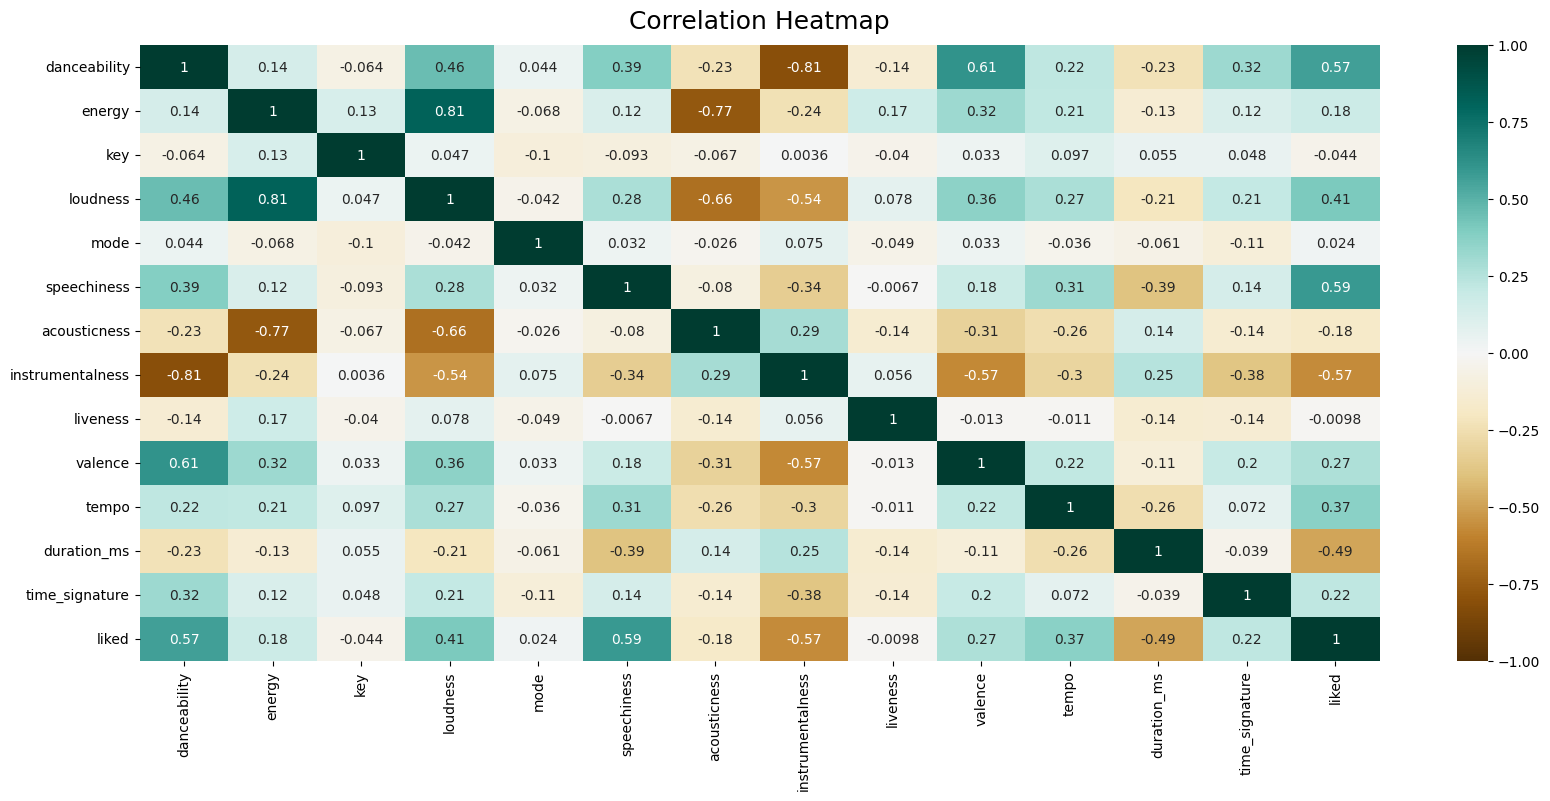

In [15]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# **Building ML Models**

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [17]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)

In [20]:
print("Accuracy score of the Decision Tree Model: ", accuracy_score(y_test,y_pred))

Accuracy score of the Decision Tree Model:  0.7966101694915254


In [21]:
print("ROC AUC Score of the Decision Tree Model", roc_auc_score(y_test, y_pred))

ROC AUC Score of the Decision Tree Model 0.8076470588235294


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

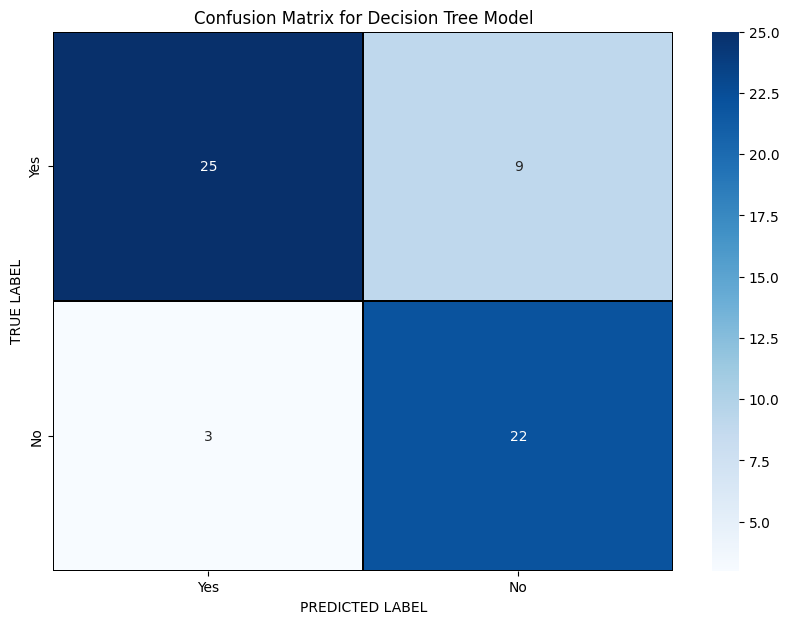

In [22]:
#Confusion Matrix of Decision Tree Model.
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Model')

# **Ensemble Models**

In [23]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier

In [24]:
rf_clf = RandomForestClassifier(n_estimators=100)
extraTree_clf = ExtraTreesClassifier(n_estimators=100)
bg_clf = BaggingClassifier(n_estimators=100)
ada_clf = AdaBoostClassifier(n_estimators=100)


In [25]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
extraTree_clf.fit(X_train, y_train)

ExtraTreesClassifier()

In [27]:
bg_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=100)

In [28]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [29]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_et = extraTree_clf.predict(X_test)
y_pred_bg = bg_clf.predict(X_test)
y_pred_ada = ada_clf.predict(X_test)

In [30]:
print("Accuracy Score of the Random Forest Model", accuracy_score(y_test, y_pred_rf))
print("Accuracy Score of the Extre Tree Classifier Model", accuracy_score(y_test, y_pred_et))
print("Accuracy Score of the Bagging Classifier Model", accuracy_score(y_test, y_pred_bg))
print("Accuracy Score of the AdaBoost Classifier Model", accuracy_score(y_test, y_pred_ada))

Accuracy Score of the Random Forest Model 0.8983050847457628
Accuracy Score of the Extre Tree Classifier Model 0.9322033898305084
Accuracy Score of the Bagging Classifier Model 0.847457627118644
Accuracy Score of the AdaBoost Classifier Model 0.847457627118644


In [31]:
print("ROC AUC Score of the Random Forest Model", roc_auc_score(y_test, y_pred_rf))
print("ROC AUC Score of the Extre Tree Classifier Model", roc_auc_score(y_test, y_pred_et))
print("ROC AUC Score of the Bagging Classifier Model", roc_auc_score(y_test, y_pred_bg))
print("ROC AUC Score of the AdaBoost Classifier Model", roc_auc_score(y_test, y_pred_ada))

ROC AUC Score of the Random Forest Model 0.9117647058823529
ROC AUC Score of the Extre Tree Classifier Model 0.9411764705882353
ROC AUC Score of the Bagging Classifier Model 0.8570588235294119
ROC AUC Score of the AdaBoost Classifier Model 0.8570588235294119


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier Model')

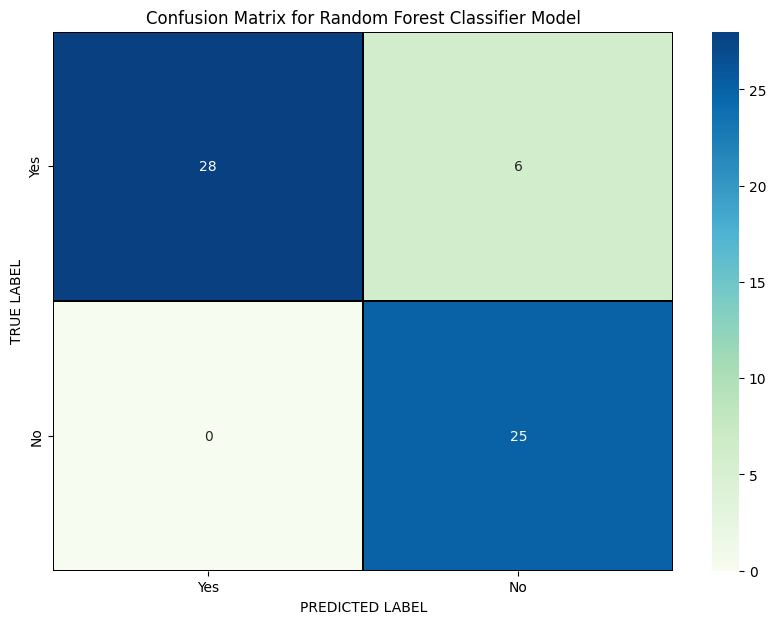

In [32]:
#Confusion Matrix of Random Forest Classifier Model.
cm = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="GnBu",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Extra Tree Classifier Model')

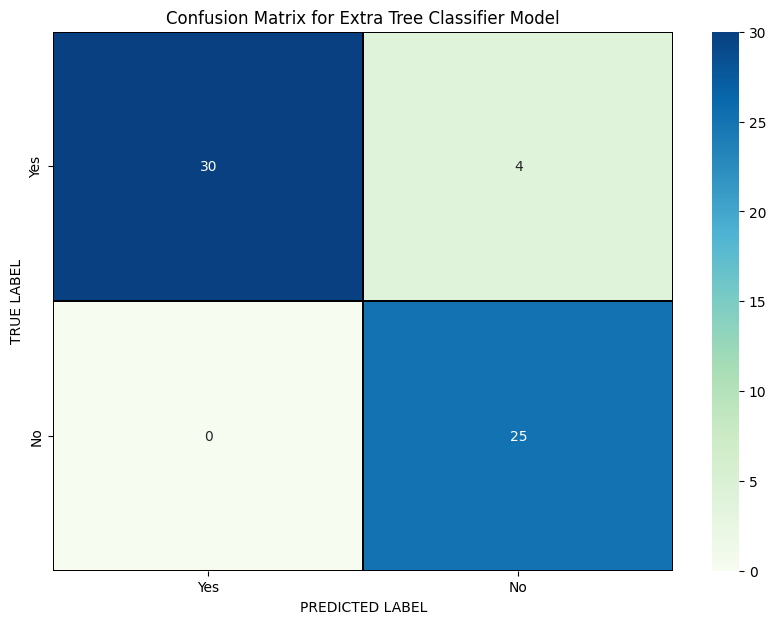

In [33]:
cm = confusion_matrix(y_test, y_pred_et)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="GnBu",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra Tree Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

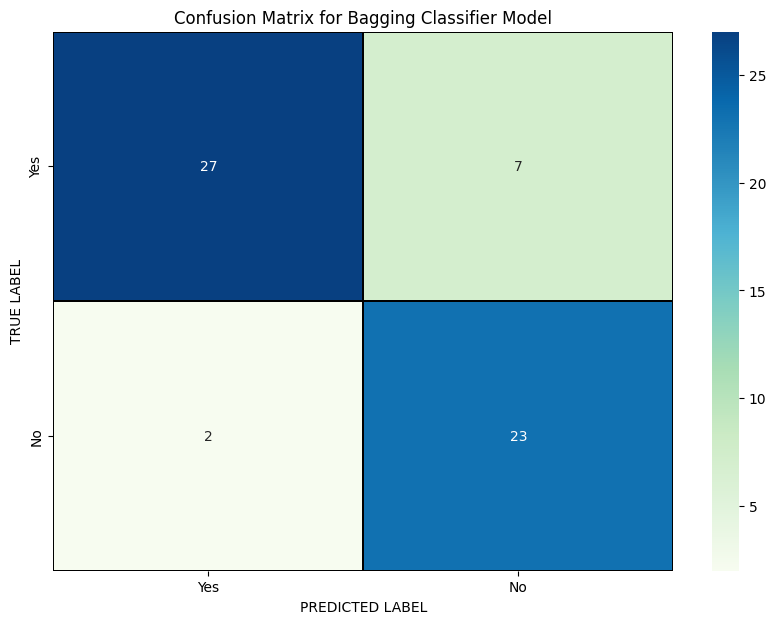

In [34]:
#Confusion Matrix of Bagging Classifier Model.
cm = confusion_matrix(y_test, y_pred_bg)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="GnBu",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost Classifier Model')

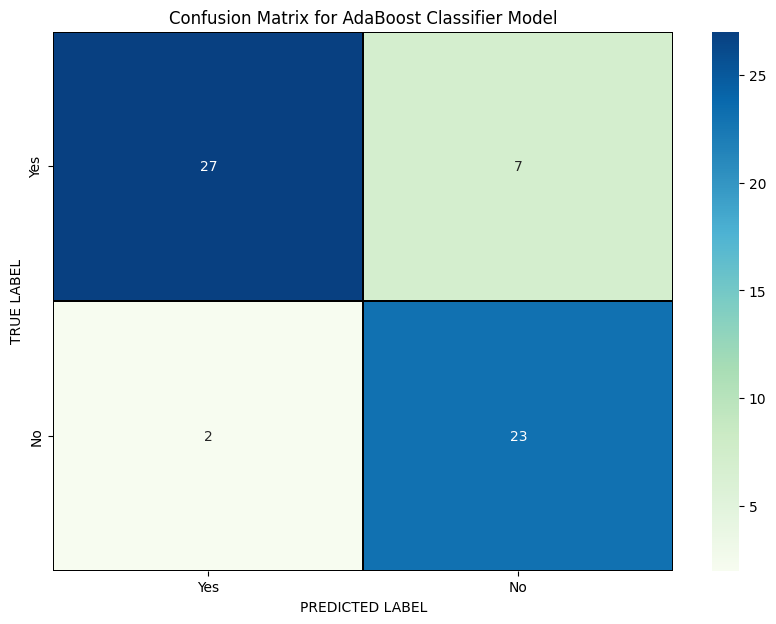

In [35]:
#Confusion Matrix of AdaBoost Classifier Model.
cm = confusion_matrix(y_test, y_pred_ada)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="GnBu",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier Model')

# **LGBM Classifier**

In [38]:
from lightgbm import LGBMClassifier

In [39]:
lgbm_clf = LGBMClassifier()

In [42]:
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 75, number of negative: 61
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 136, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.551471 -> initscore=0.206614
[LightGBM] [Info] Start training from score 0.206614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

LGBMClassifier()

In [43]:
y_pred_lgbm = lgbm_clf.predict(X_test)

In [44]:
print("Accuracy Score of the LGBM Model", accuracy_score(y_test, y_pred_lgbm))

Accuracy Score of the LGBM Model 0.864406779661017


In [45]:
print("ROC AUC Score of the LGBM Model", roc_auc_score(y_test, y_pred_lgbm))

ROC AUC Score of the LGBM Model 0.8770588235294119


Text(0.5, 1.0, 'Confusion Matrix for LGBM Classifier Model')

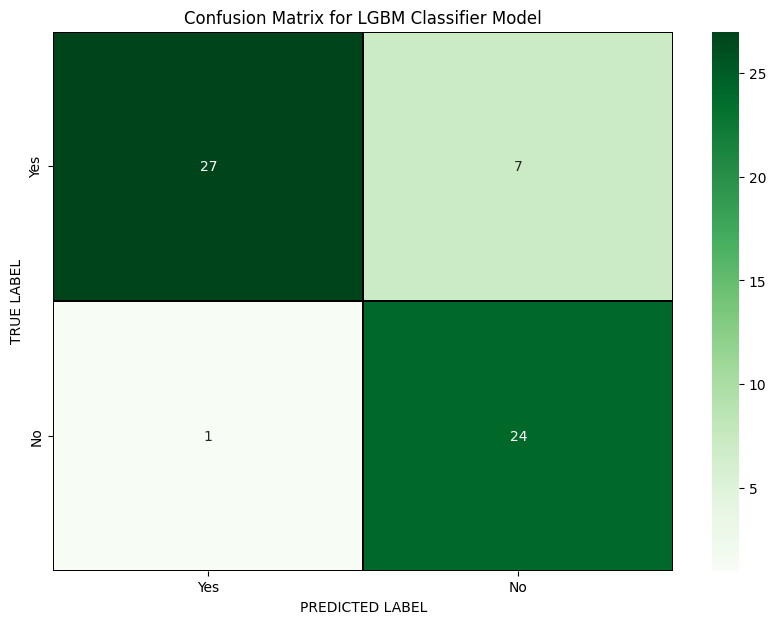

In [46]:
#Confusion Matrix of LGBM Classifier Model.
cm = confusion_matrix(y_test, y_pred_lgbm)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LGBM Classifier Model')

# **Saving the best model**

In [48]:
from joblib import dump
MODEL_NAME = "recommender.pkl"
dump(extraTree_clf, MODEL_NAME)

['recommender.pkl']